In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
imgpath = '/data/BRIDGE/yolo-rotate/data/images/sentinel/org/train/'
imglist = os.listdir(imgpath)

In [4]:
imgpath+imglist[100]

'/data/BRIDGE/yolo-rotate/data/images/sentinel/org/train/15840_5720_16480_6360_09E3.tif'

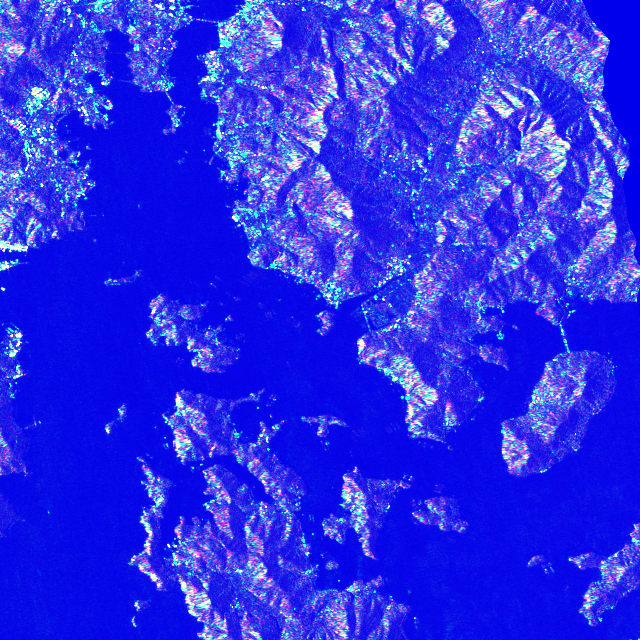

In [3]:
Image.open(imgpath+imglist[100])

In [7]:
lblpath = '/data/BRIDGE/yolo-rotate/data/labels/sentinel/org/train/'
lbllist = os.listdir(lblpath)

## Prepare Hyperparameters

In [22]:
import easydict

args = easydict.EasyDict({
    "weights": '',
    "cfg": 'poly_yolov7.yaml',
    "data": 'sentinel.yaml',
    "hyp": 'hyp.scratch.p5.yaml',
    "epochs": 10,
    "image_weights": False,
    "batch_size": 16,
    "cache_images": True,
    "local_rank": -1,
    "world_size": 1,
    "rank": -1,
    "quad": False,
    "workers": 8,
    "polygon": True,
    "divide": False,
    "rect": False,
    "single_cls": True
})
'''
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--weights', type=str, default='', help='initial weights path')
parser.add_argument('--cfg', type=str, default='yolov7.yaml', help='model.yaml path')
parser.add_argument('--data', type=str, default='data/sentinel.yaml', help='data.yaml path')
parser.add_argument('--hyp', type=str, default='data/hyp.scratch.p5.yaml', help='hyperparameters path')
parser.add_argument('--epochs', type=int, default=300)
parser.add_argument('--image-weights', action='store_true', help='use weighted image selection for training')
parser.add_argument('--batch-size', type=int, default=16, help='total batch size for all GPUs')
parser.add_argument('--cache-images', action='store_true', help='cache images for faster training')
parser.add_argument('--local_rank', type=int, default=-1, help='DDP parameter, do not modify')
parser.add_argument('--quad', action='store_true', help='quad dataloader')
parser.add_argument('--workers', type=int, default=8, help='maximum number of dataloader workers')
parser.add_argument('--polygon', default=True, action='store_true', help='enable polygon anchor boxes')
parser.add_argument('--divide', default=False, action='store_true', help='divide images into patches')
parser.add_argument('--source', type=str, help='dst source of tif files')
opt = parser.parse_args()

opt.world_size = 1

# error message: https://stackoverflow.com/questions/48796169/how-to-fix-ipykernel-launcher-py-error-unrecognized-arguments-in-jupyter
'''

"\nimport argparse\n\nparser = argparse.ArgumentParser()\nparser.add_argument('--weights', type=str, default='', help='initial weights path')\nparser.add_argument('--cfg', type=str, default='yolov7.yaml', help='model.yaml path')\nparser.add_argument('--data', type=str, default='data/sentinel.yaml', help='data.yaml path')\nparser.add_argument('--hyp', type=str, default='data/hyp.scratch.p5.yaml', help='hyperparameters path')\nparser.add_argument('--epochs', type=int, default=300)\nparser.add_argument('--image-weights', action='store_true', help='use weighted image selection for training')\nparser.add_argument('--batch-size', type=int, default=16, help='total batch size for all GPUs')\nparser.add_argument('--cache-images', action='store_true', help='cache images for faster training')\nparser.add_argument('--local_rank', type=int, default=-1, help='DDP parameter, do not modify')\nparser.add_argument('--quad', action='store_true', help='quad dataloader')\nparser.add_argument('--workers', t

In [23]:
import yaml 
from utils.general import check_file

gs = 32
train_path = imgpath
imgsz = 640
batch_size = 16

args.hyp  = check_file(args.hyp)
with open(args.hyp) as f:
    hyp = yaml.load(f, Loader=yaml.SafeLoader) 

args.data, args.cfg, args.hyp, args.weights = check_file(args.data), check_file(args.cfg), check_file(args.hyp), check_file(args.weights)  # check files
        


## Prepare Datasets

In [24]:
from utils.datasets import create_dataloader
from utils.general import colorstr

dataloader, dataset = create_dataloader(train_path, imgsz, batch_size, gs, args,
                                            hyp=hyp, augment=True, cache=args.cache_images, rect=args.rect, rank=args.rank,
                                            world_size=args.world_size, workers=args.workers,
                                            image_weights=args.image_weights, quad=args.quad, prefix=colorstr('train: '), 
                                            polygon=args.polygon)

FileNotFoundError: [Errno 2] No such file or directory: './data/yolo-rotate.yaml'